In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('data.csv')
df.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2CdS3DRqWR5LAhy4hM5X9W,0.457,0.909,0,-9.451,1,0.0317,0.001600,0.000276,0.1350,0.755,115.998,4
1,3r0mb1tzAcCNoA8YRXuIhZ,0.582,0.817,0,-6.475,1,0.0399,0.001700,0.015800,0.5750,0.622,155.124,4
2,0Sfj5fPqZzCq9o3f1NNphz,0.525,0.976,0,-2.023,1,0.0479,0.066200,0.000392,0.0804,0.855,138.984,4
3,5J7l2wE9wxqod7xIP0jyAB,0.210,0.870,5,-5.985,1,0.0606,0.000147,0.000488,0.1880,0.517,168.352,4
4,21REQ1bCUWphT2QK3bLWYQ,0.692,0.799,1,-7.924,1,0.1640,0.388000,0.000000,0.3010,0.549,97.978,4


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26752 entries, 0 to 26751
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26752 non-null  object 
 1   danceability      26752 non-null  float64
 2   energy            26752 non-null  float64
 3   key               26752 non-null  int64  
 4   loudness          26752 non-null  float64
 5   mode              26752 non-null  int64  
 6   speechiness       26752 non-null  float64
 7   acousticness      26752 non-null  float64
 8   instrumentalness  26752 non-null  float64
 9   liveness          26752 non-null  float64
 10  valence           26752 non-null  float64
 11  tempo             26752 non-null  float64
 12  time_signature    26752 non-null  int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 2.7+ MB


In [8]:
df.shape

(26752, 13)

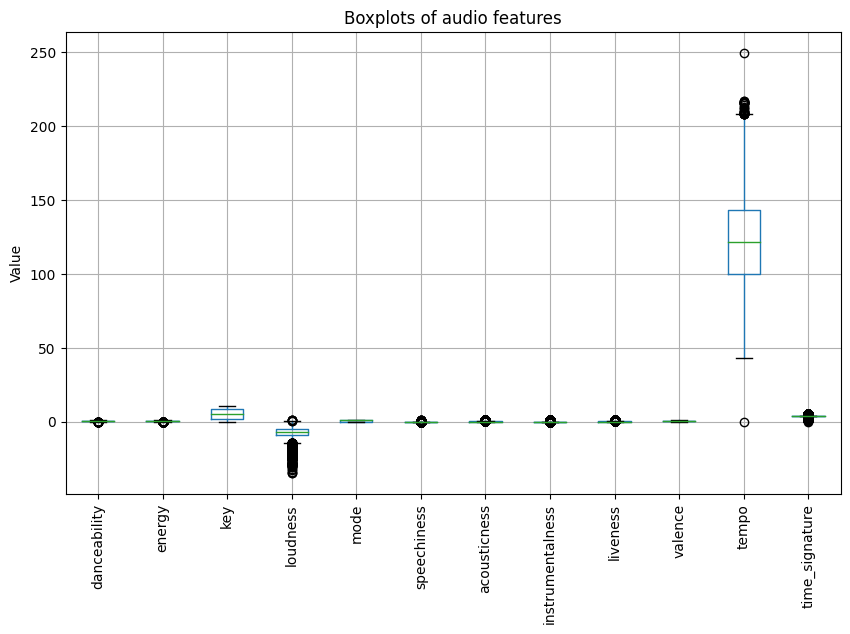

In [9]:
# Extract the feature columns from the dataframe
feature_cols = list(df.columns[1:])

# Plot boxplots of all features
fig, ax = plt.subplots(figsize=(10, 6))
df[feature_cols].boxplot(ax=ax)
ax.set_title('Boxplots of audio features')
ax.set_ylabel('Value')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


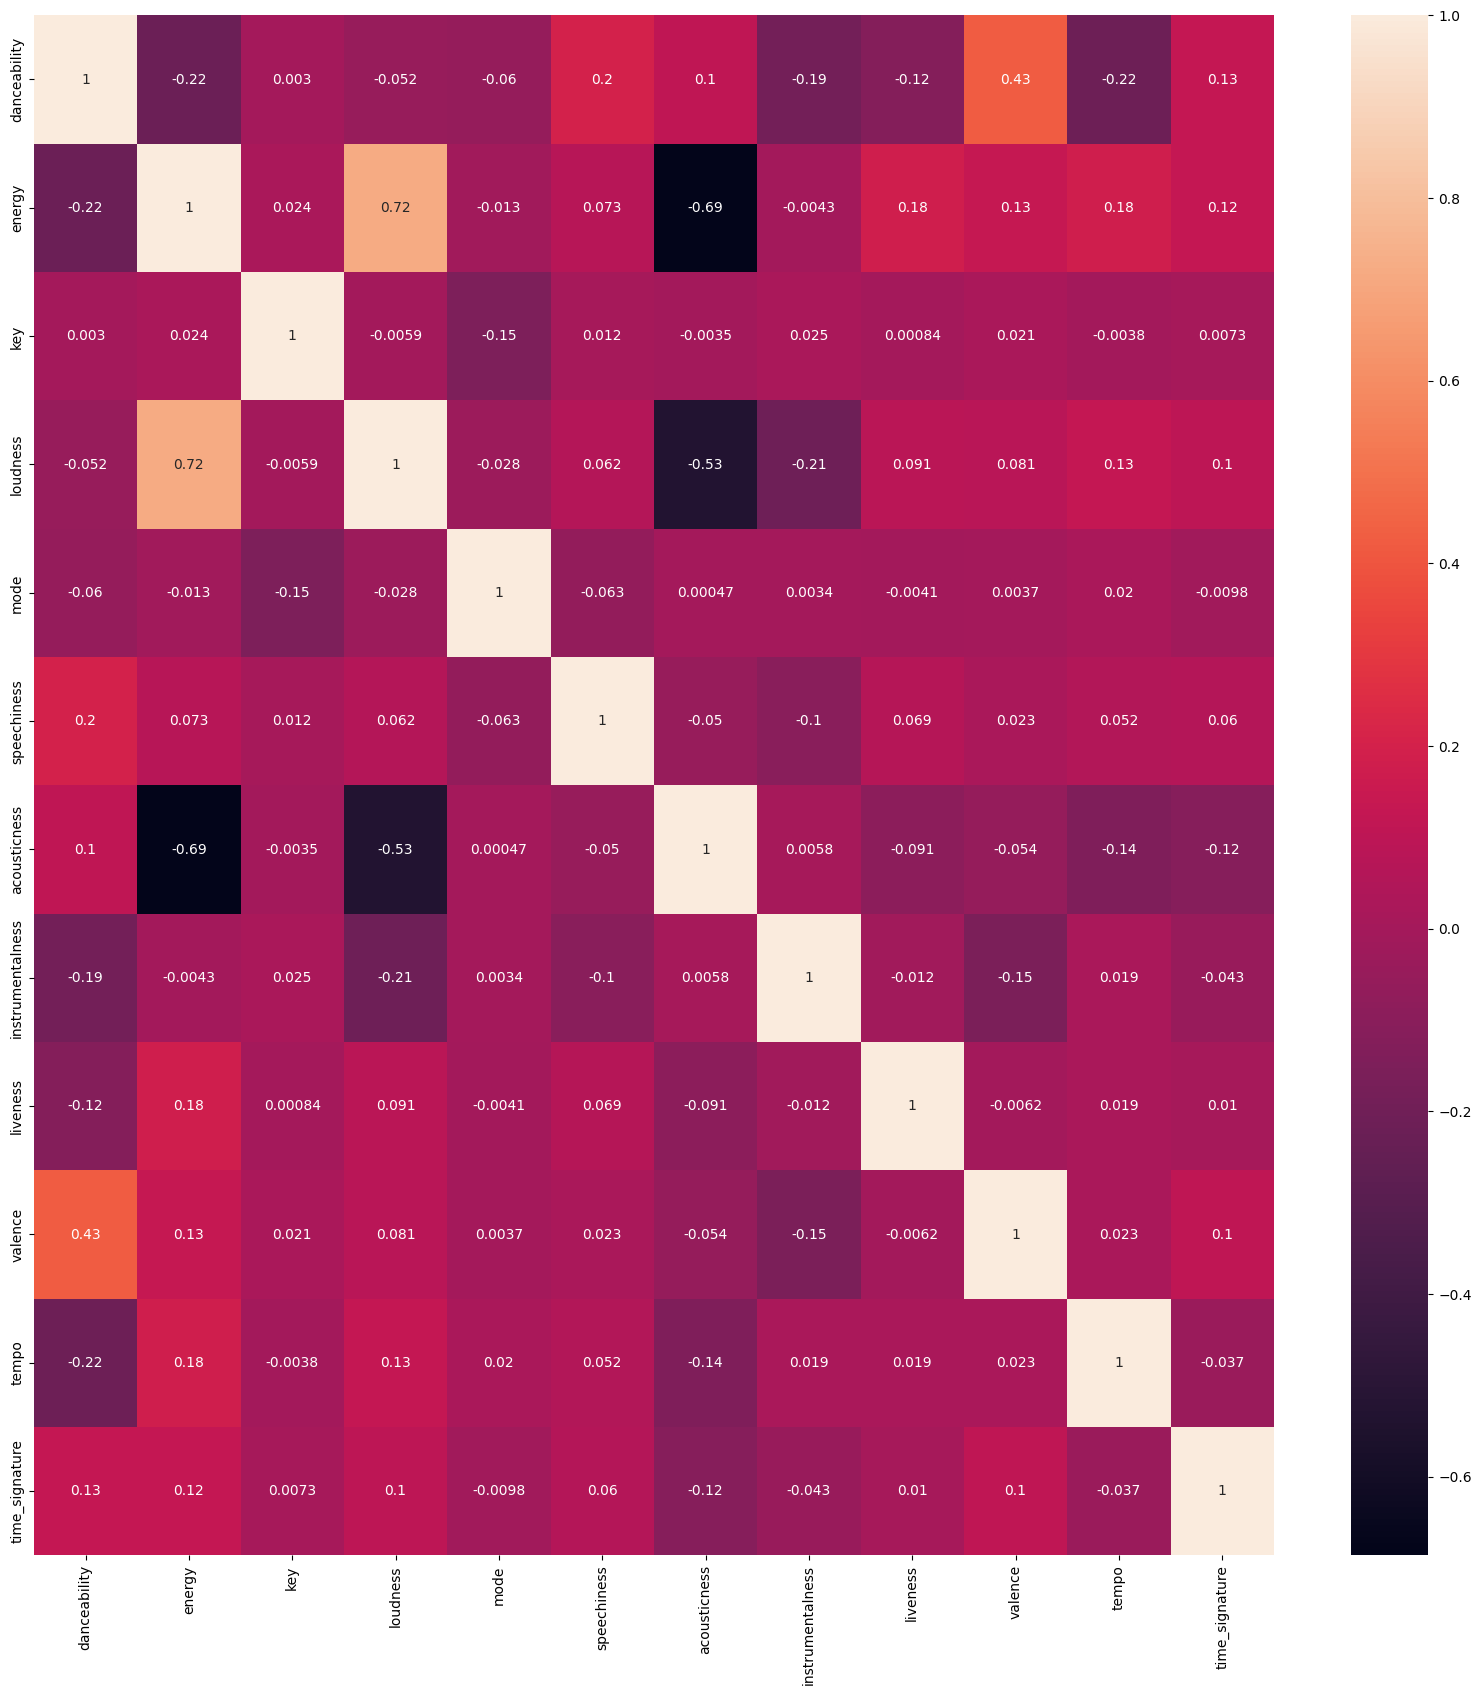

In [10]:
plt.figure(figsize = (20,20))
corr = df.iloc[: , 1:].corr()
dataplot = sns.heatmap(corr, annot=True)
plt.show()

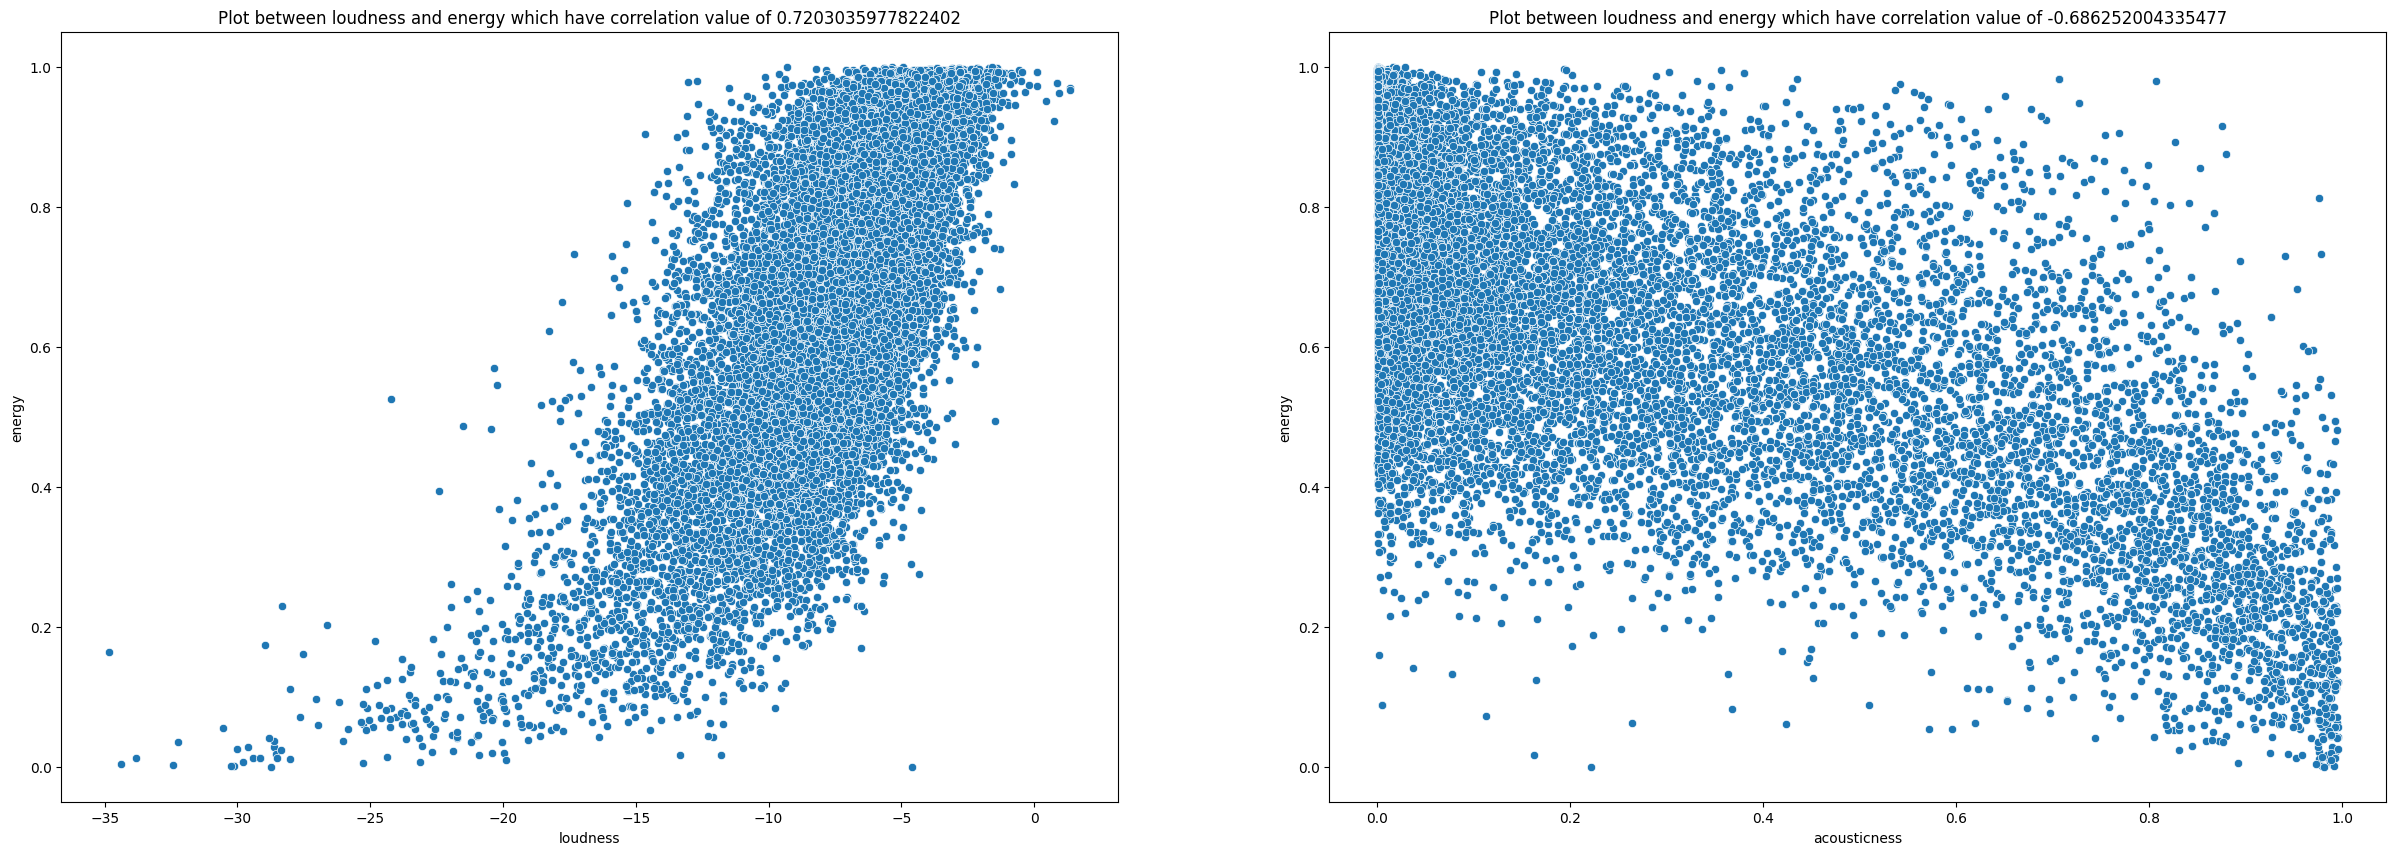

In [11]:
plt.figure(figsize = (30,10))

#plot between parameters with max correlation rating
plt.subplot(121)
sns.scatterplot(x = df['loudness'],y= df['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['loudness']['energy']}")

#plot between parameters with min correlation rating
plt.subplot(122)
sns.scatterplot(x = df['acousticness'],y= df['energy'])
plt.title(f"Plot between loudness and energy which have correlation value of {corr['acousticness']['energy']}")

plt.show()

In [12]:
scaler = StandardScaler()
df[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

In [13]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04,26752.000000,2.675200e+04,26752.000000,2.675200e+04,2.675200e+04,2.675200e+04,2.675200e+04
mean,-4.462140e-16,-8.010604e-16,1.992027e-17,6.799452e-17,1.088975e-16,0.000000,1.274897e-17,0.000000,-1.243025e-16,1.827353e-16,1.997339e-16,1.014606e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019,1.000019e+00,1.000019,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-3.309825e+00,-3.316549e+00,-1.485873e+00,-8.330535e+00,-1.285862e+00,-0.970447,-7.043007e-01,-0.449432,-1.193169e+00,-2.114783e+00,-4.215681e+00,-1.176318e+01
25%,-6.732107e-01,-6.688271e-01,-9.251246e-01,-4.741178e-01,-1.285862e+00,-0.562725,-6.953710e-01,-0.449432,-6.465358e-01,-7.741986e-01,-8.096306e-01,1.901214e-01
50%,-6.549817e-03,1.473462e-01,-8.400124e-02,1.909741e-01,7.776883e-01,-0.394170,-5.368222e-01,-0.448368,-4.116243e-01,-1.610420e-02,-6.083542e-02,1.901214e-01
75%,6.961468e-01,8.448897e-01,1.037497e+00,6.873024e-01,7.776883e-01,0.069357,3.695207e-01,-0.313746,4.396896e-01,7.676883e-01,6.668458e-01,1.901214e-01
max,2.630064e+00,1.428549e+00,1.598245e+00,2.592309e+00,7.776883e-01,9.962872,3.048422e+00,3.596778,5.080311e+00,2.108273e+00,4.278859e+00,3.178446e+00


In [ ]:
data = df.iloc[:,1:].values
# Initialize the SOM
som_shape = (20, 20)
input_dim = data.shape[1] # the number of features in your dataset
som = MiniSom(som_shape[0], som_shape[1], input_dim, sigma=1.0, learning_rate=0.5)

q_error = []
t_error = []

# Train the SOM
num_iterations = 1000
for i in range(num_iterations):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, num_iterations)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))


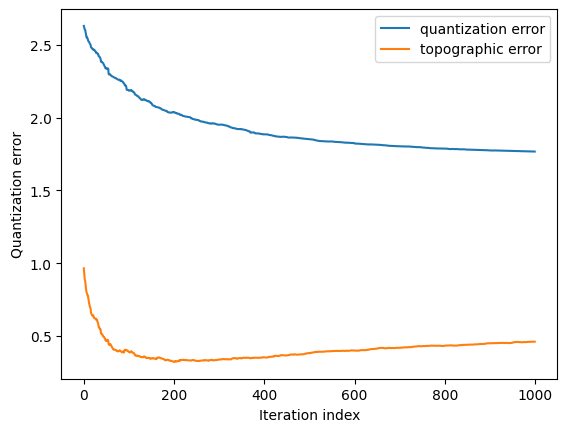

In [16]:
plt.plot(np.arange(num_iterations), q_error, label='quantization error')
plt.plot(np.arange(num_iterations), t_error, label='topographic error')
plt.ylabel('Quantization error')
plt.xlabel('Iteration index')
plt.legend()
plt.show()

In [17]:
# for each item in your dataset, find the best matching unit (BMU) in the SOM and use its coordinates as the encoded representation
encoded_data = np.array([som.winner(x) for x in data])


In [18]:
from sklearn.neighbors import NearestNeighbors
# define the number of neighbors to return
n_neighbors = 5
# define the distance metric to use
distance_metric = 'euclidean' # or 'cosine', or other distance metrics supported by scikit-learn
# initialize the nearest neighbors model with the encoded data
model = NearestNeighbors(n_neighbors=n_neighbors, metric=distance_metric)
model.fit(encoded_data)

NearestNeighbors(metric='euclidean')

In [19]:
# generate a random item from the the orginal dataset df
random_item = df.sample(1)
# encode the random item
encoded_random_item = som.winner(random_item.iloc[:,1:].values)
# find the k nearest neighbors for the encoded random item
encoded_random_item = np.array(encoded_random_item)
distances, indices = model.kneighbors(encoded_random_item.reshape(1, -1))
# here we print the indices of the k nearest neighbors
print(indices[0])
# here we print the items corresponding to the indices of the k nearest neighbors
print(data[indices[0]])
# here we print the items corresponding to the indices of the k nearest neighbors from the original dataset df with their id
print(df.iloc[indices[0], :]['id'])


[1127 1640 1513  917 1487]
[[ 1.33277798 -1.02471661  1.03749654 -0.62537117  0.77768827 -0.03883724
  -0.64175527 -0.44943194 -0.68878143  1.11889583  1.44135224  0.19012143]
 [ 0.36581935  0.7642214   0.75712209 -0.58672761  0.77768827 -0.46933668
  -0.69476813 -0.44321638 -0.25800377  0.82765054  0.42297996  0.19012143]
 [-0.17471654 -0.01873555  1.03749654 -1.37016548  0.77768827 -0.52286439
  -0.70087573 -0.41932912 -0.82768002  0.70344299  0.2019989   0.19012143]
 [ 0.12558118  0.14734623 -0.08400124 -0.11636298  0.77768827 -0.56272544
  -0.68625292 -0.44943194 -0.60365004  0.60493355  0.82618782  0.19012143]
 [ 0.36581935  0.42731265  0.47674765 -0.27486197  0.77768827 -0.5843643
  -0.44545318 -0.44936857 -0.40522348  0.69915997  0.41412573  0.19012143]]
1127    3qcyIr1omzr2MDPAvsh0it
1640    1BJhCk0ZnFYUbobYINT6UE
1513    3FgEerIxXNMRhY2KV5Kl44
917     14gw6qQSrs9pEf8ADJuHo1
1487    3eyYxeswyx7wmO3n8EHKuD
Name: id, dtype: object


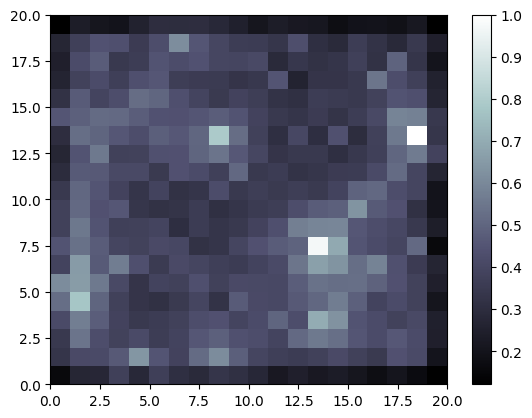

In [24]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

# use different colors and markers for each label
markers = ['o', 's', 'D', 'v', '^', 'p', 'X', 'P', '8', 'd']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C8', 'C9']

for i, x in enumerate(data):
    w = som.winner(x) # get the winner
    # place a marker on the winning position for the sample xx
    #plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2)

show()


In [54]:
cid = '7121fea2c5374cb2a4915ce25eae38ad'
secret = '38eae86b44974aa59bbe404c6135998f'
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [55]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [56]:
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    
    #Track name
    track_name = track["track"]["name"]
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    
    #Album
    album = track["track"]["album"]["name"]
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]

In [57]:
sp.audio_features(track_uri)[0]


{'danceability': 0.429,
 'energy': 0.661,
 'key': 11,
 'loudness': -7.227,
 'mode': 1,
 'speechiness': 0.0281,
 'acousticness': 0.00239,
 'instrumentalness': 0.000121,
 'liveness': 0.234,
 'valence': 0.285,
 'tempo': 173.372,
 'type': 'audio_features',
 'id': '3AJwUDP919kvQ9QcozQPxg',
 'uri': 'spotify:track:3AJwUDP919kvQ9QcozQPxg',
 'track_href': 'https://api.spotify.com/v1/tracks/3AJwUDP919kvQ9QcozQPxg',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3AJwUDP919kvQ9QcozQPxg',
 'duration_ms': 266773,
 'time_signature': 4}

In [58]:
# generate a random item from the the orginal dataset df
random_item = df.sample(1)
# encode the random item
encoded_random_item = som.winner(random_item.iloc[:,1:].values)
# find the k nearest neighbors for the encoded random item
encoded_random_item = np.array(encoded_random_item)
distances, indices = model.kneighbors(encoded_random_item.reshape(1, -1))
# here we print the indices of the k nearest neighbors
print(indices[0])
# here we print the items corresponding to the indices of the k nearest neighbors
print(data[indices[0]])
# here we print the items corresponding to the indices of the k nearest neighbors from the original dataset df with their id
print(df.iloc[indices[0], :]['id'])

[ 331 8476  833  299  639]
[[-1.91644327  1.17230806  0.47674765  0.85636797  0.77768827 -0.21764256
  -0.65833356 -0.44941837 -0.70606375 -0.99263252  1.98084708  0.19012143]
 [-1.4659967   0.43680304  0.47674765  0.55054039  0.77768827  0.38482887
  -0.59691851 -0.44616573  1.25899929 -1.51087782  2.36900276  0.19012143]
 [-1.4659967   0.43680304  0.47674765  0.55054039  0.77768827  0.38482887
  -0.59691851 -0.44616573  1.25899929 -1.51087782  2.36900276  0.19012143]
 [-1.70623488  0.166327   -0.92512458 -0.23168987  0.77768827 -0.142476
  -0.69729255 -0.23249662 -0.52683976 -0.79989667  2.85816472  0.19012143]
 [-1.23176449  0.40833188  0.47674765  0.67643387  0.77768827 -0.47617
  -0.69808379 -0.41668852 -0.4756329  -1.31814196  1.77747231  0.19012143]]
331     4aQSJS43Lwfc6egUwKbXhb
8476    28POcTYQKfkjz6qTIvtjG1
833     28POcTYQKfkjz6qTIvtjG1
299     2p63LoJNfFVnW3CR54b6QE
639     3ORCMXu4CAvrrzUodj91gA
Name: id, dtype: object


In [59]:
cols = random_item.iloc[:,1:].columns
test_track = []
for col in cols:
    test_track.append(sp.audio_features(track_uri)[0][col])

test_track = np.array(test_track)
test_track_norm = scaler.transform(test_track.reshape(1, -1))
encoded_random_item = som.winner(test_track_norm)
encoded_random_item = np.array(encoded_random_item)
distances, indices = model.kneighbors(encoded_random_item.reshape(1, -1))
print(indices[0])
print(df.iloc[indices[0], :]['id'])
ids = df.iloc[indices[0], :]['id']

[ 802 5451 1704 7185 5018]
802     5AB637hS20wvfb5tKG3C3O
5451    7kjYPapOatvPuqPuMn4TgM
1704    4Vz0Wt4ySnCJi7WJycnoNj
7185    6TV5YIX27b0ewliqXo5gWx
5018    2eFjKl5cyPPYElDByCh6Tb
Name: id, dtype: object


In [60]:
test_track_norm

array([[-7.33270284e-01, -1.80072138e-01,  1.59824543e+00,
         1.37912449e-03,  7.77688267e-01, -6.50419774e-01,
        -6.95295623e-01, -4.48940385e-01,  2.28461347e-01,
        -8.94123085e-01,  1.68845328e+00,  1.90121434e-01]])

In [75]:
# use ids to get the track names and photos from Spotify
track_names = []
track_photos = []
artist_name = []
for id in ids:
    track_names.append(sp.track(id)["name"])
    track_photos.append(sp.track(id)["album"]["images"][0]["url"])
    # get the artist name
    artist_name.append(sp.track(id)["artists"][0]["name"])
    

In [67]:
track_names

['El President', 'california world', 'Idaho', 'Difficult', 'First Time']

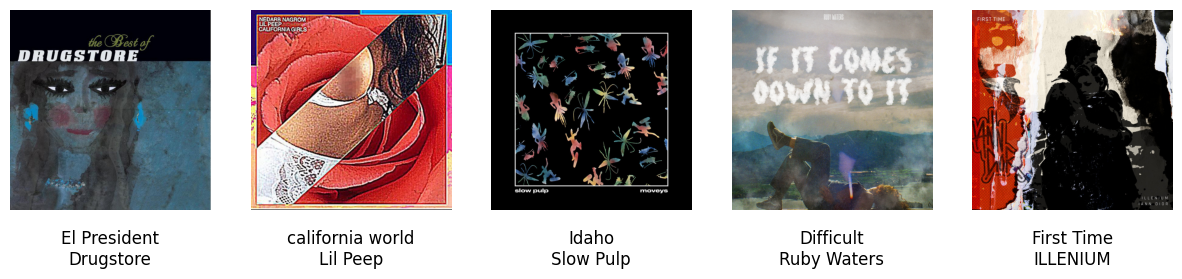

In [76]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

track_artist_names = list(zip(track_names, artist_name))

def plot_images_with_names(image_urls, track_artist_names):
    fig, axes = plt.subplots(1, len(image_urls), figsize=(15, 15))
    fig.subplots_adjust(bottom=0.15)  # Add padding to the bottom of the plot

    for i, (url, (track_name, artist_name)) in enumerate(zip(image_urls, track_artist_names)):
        with urllib.request.urlopen(url) as response:
            img = Image.open(response)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].text(0.5, -0.1, f"{track_name}\n{artist_name}", fontsize=12, wrap=True,
                         horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

    plt.show()

plot_images_with_names(track_photos, track_artist_names)

